In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from statannotations.Annotator import Annotator #https://github.com/trevismd/statannotations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data
from _cd_diagram import *

# Getting some free samples
results_df.sample(3)

print(gens)

# Don't change any code below, it may break (probably will) --------------------

['../models/SimplifierTopDown1e-1.py', '../models/SimplifierBottomUpOnlyLast.py', '../models/SimplifierTopDownOnlyLast.py', '../models/SimplifierTopDown1e-0.py', '../models/SimplifierTopDown1e-4.py', '../models/SimplifierTopDown1e-6.py', '../models/Vanilla.py', '../models/SimplifierTopDown.py', '../models/SimplifierTopDown1e-10.py', '../models/SimplifierTopDown1e-2.py', '../models/SimplifierBottomUp.py'] ['Top Down 1e-1', 'Bottom Up (only last)', 'Top Down (only last)', 'Top Down 1e-0', 'Top Down 1e-4', 'Top Down 1e-6', 'Without simplify', 'Top Down', 'Top Down 1e-10', 'Top Down 1e-2', 'Bottom Up']
(87, 14)
['Without simplify' 'Bottom Up']
['Airfoil' 'Concrete' 'Energy Cooling' 'Energy Heating' 'Housing' 'Yacht']
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 149]


failed to add statsannotation with dataset Airfoil
failed to add statsannotation with dataset Concrete
failed to add statsannotation with dataset Energy Cooling
failed to add statsannotation with dataset Energy Heating
failed to add statsannotation with dataset Housing
failed to add statsannotation with dataset Yacht


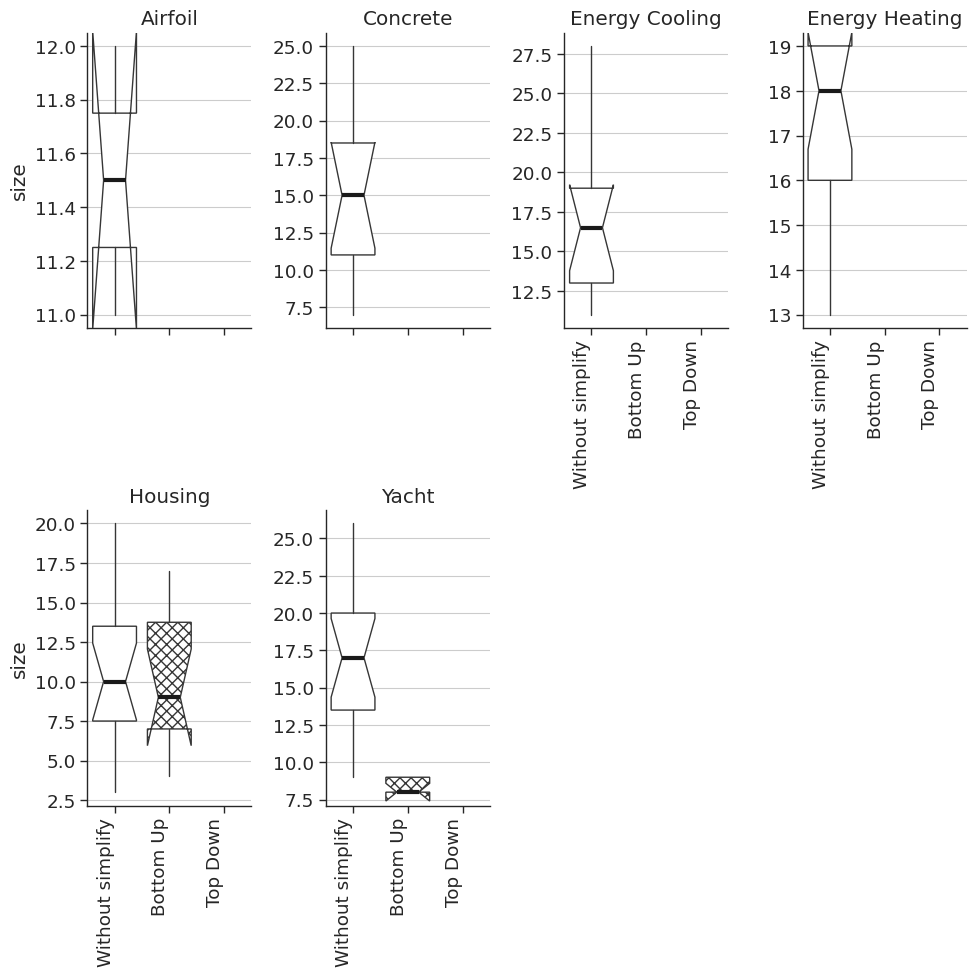

failed to add statsannotation with dataset Airfoil
failed to add statsannotation with dataset Concrete
failed to add statsannotation with dataset Energy Cooling
failed to add statsannotation with dataset Energy Heating
failed to add statsannotation with dataset Housing
failed to add statsannotation with dataset Yacht


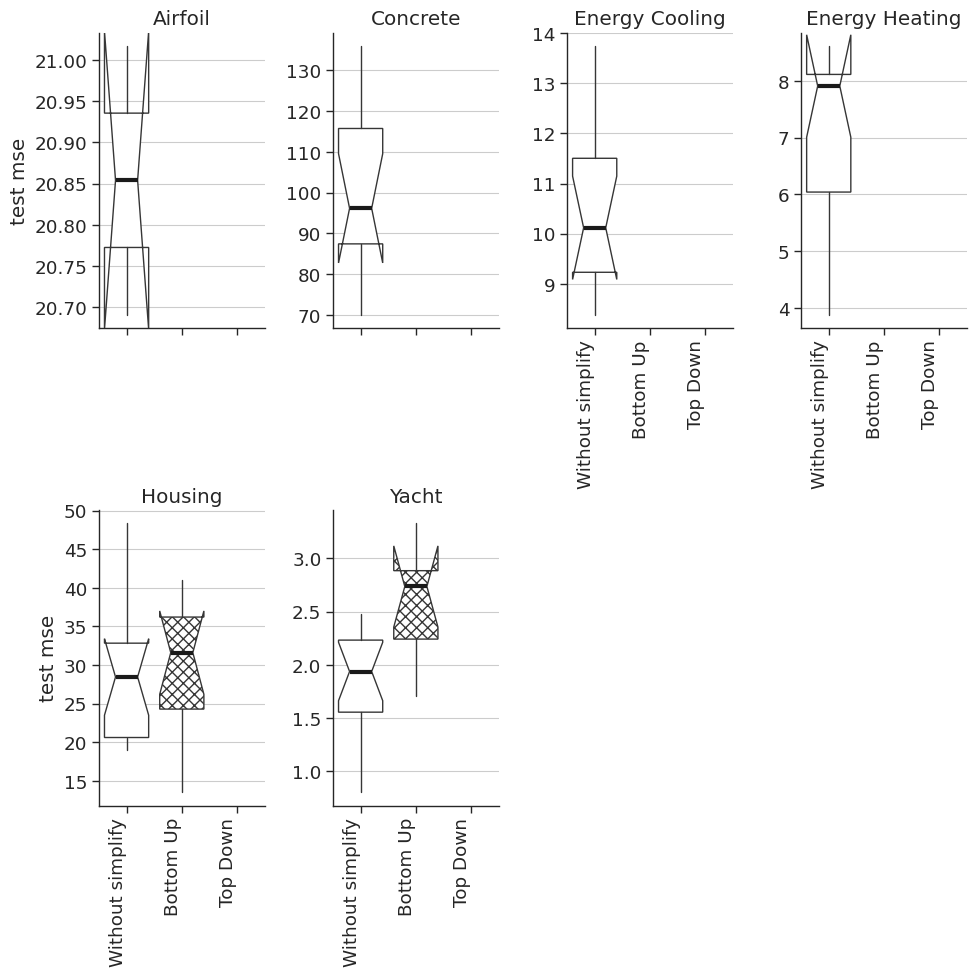

failed to add statsannotation with dataset Airfoil
failed to add statsannotation with dataset Concrete
failed to add statsannotation with dataset Energy Cooling
failed to add statsannotation with dataset Energy Heating
failed to add statsannotation with dataset Housing
failed to add statsannotation with dataset Yacht


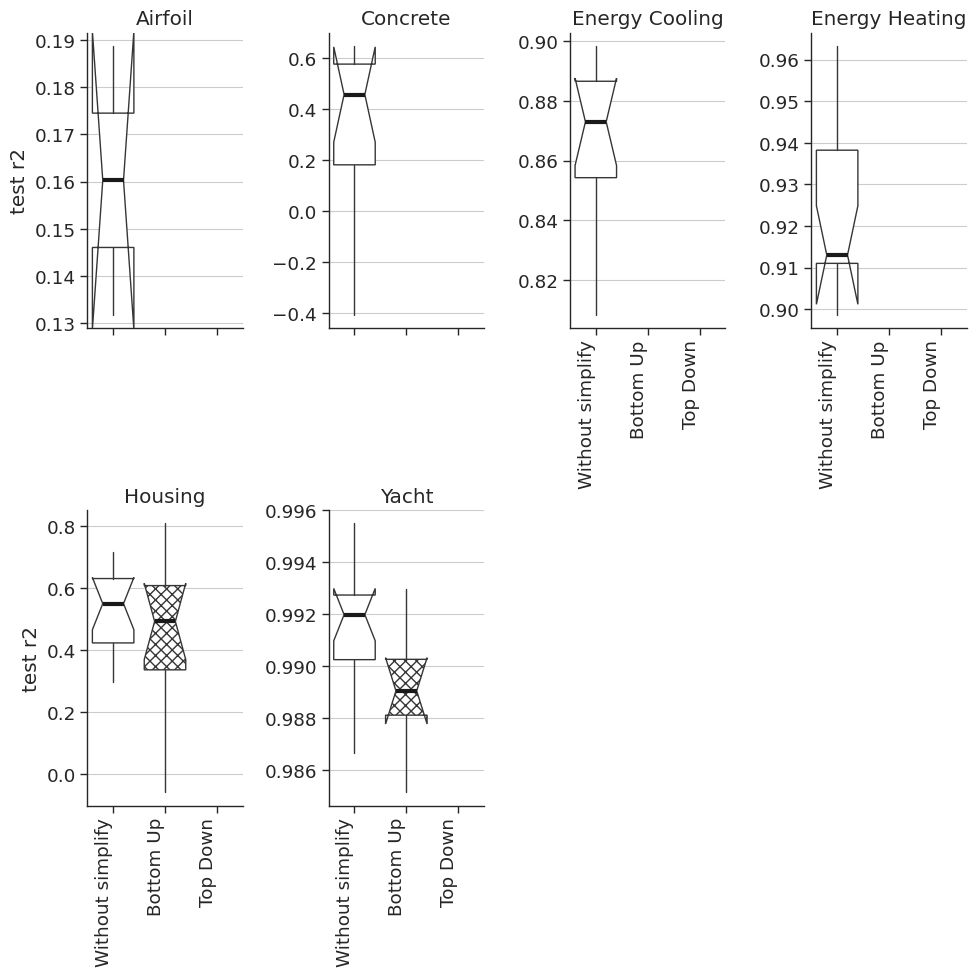

failed to add statsannotation with dataset Airfoil
failed to add statsannotation with dataset Concrete
failed to add statsannotation with dataset Energy Cooling
failed to add statsannotation with dataset Energy Heating
failed to add statsannotation with dataset Housing
failed to add statsannotation with dataset Yacht


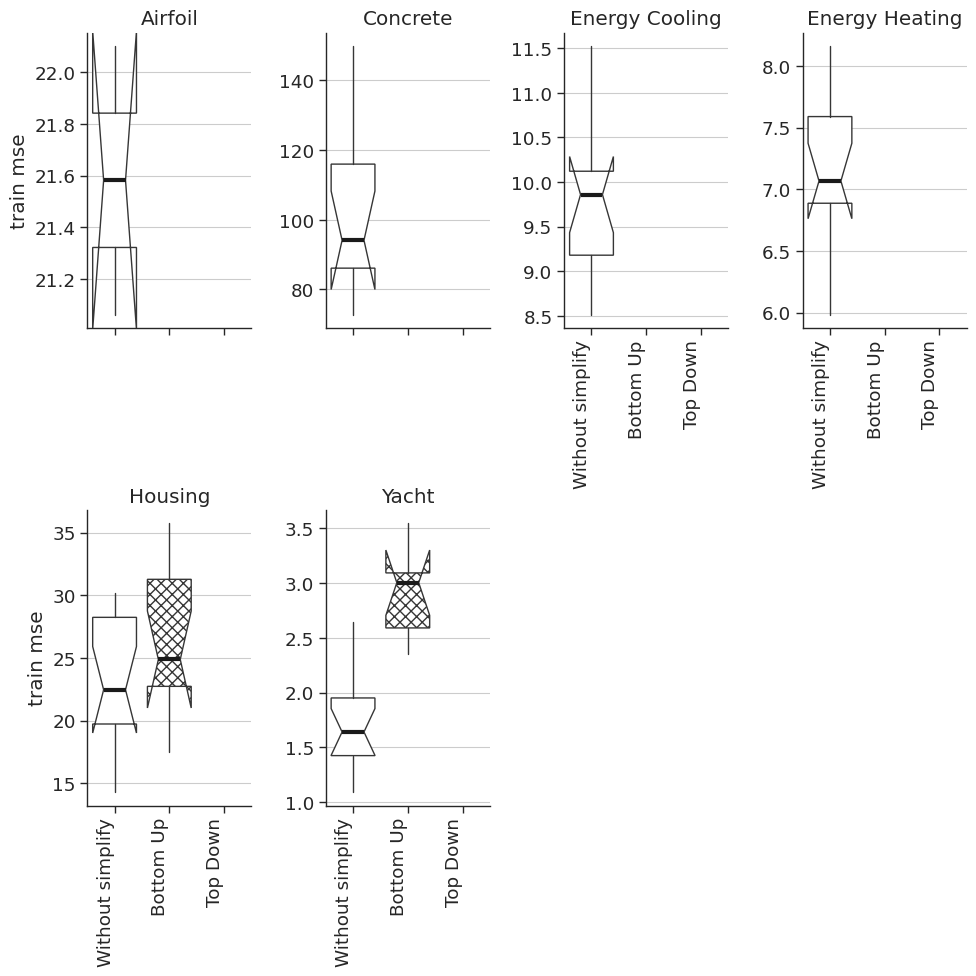

failed to add statsannotation with dataset Airfoil
failed to add statsannotation with dataset Concrete
failed to add statsannotation with dataset Energy Cooling
failed to add statsannotation with dataset Energy Heating
failed to add statsannotation with dataset Housing
failed to add statsannotation with dataset Yacht


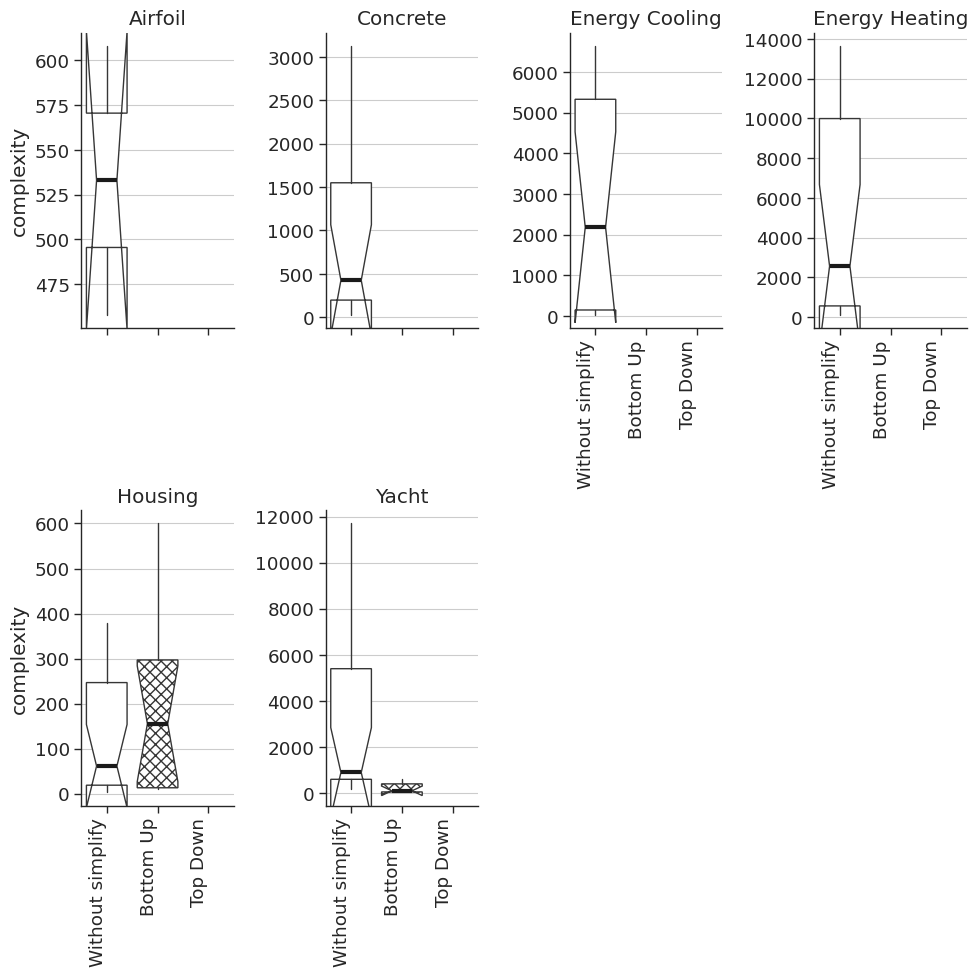

failed to add statsannotation with dataset Airfoil
failed to add statsannotation with dataset Concrete
failed to add statsannotation with dataset Energy Cooling
failed to add statsannotation with dataset Energy Heating
failed to add statsannotation with dataset Housing
failed to add statsannotation with dataset Yacht


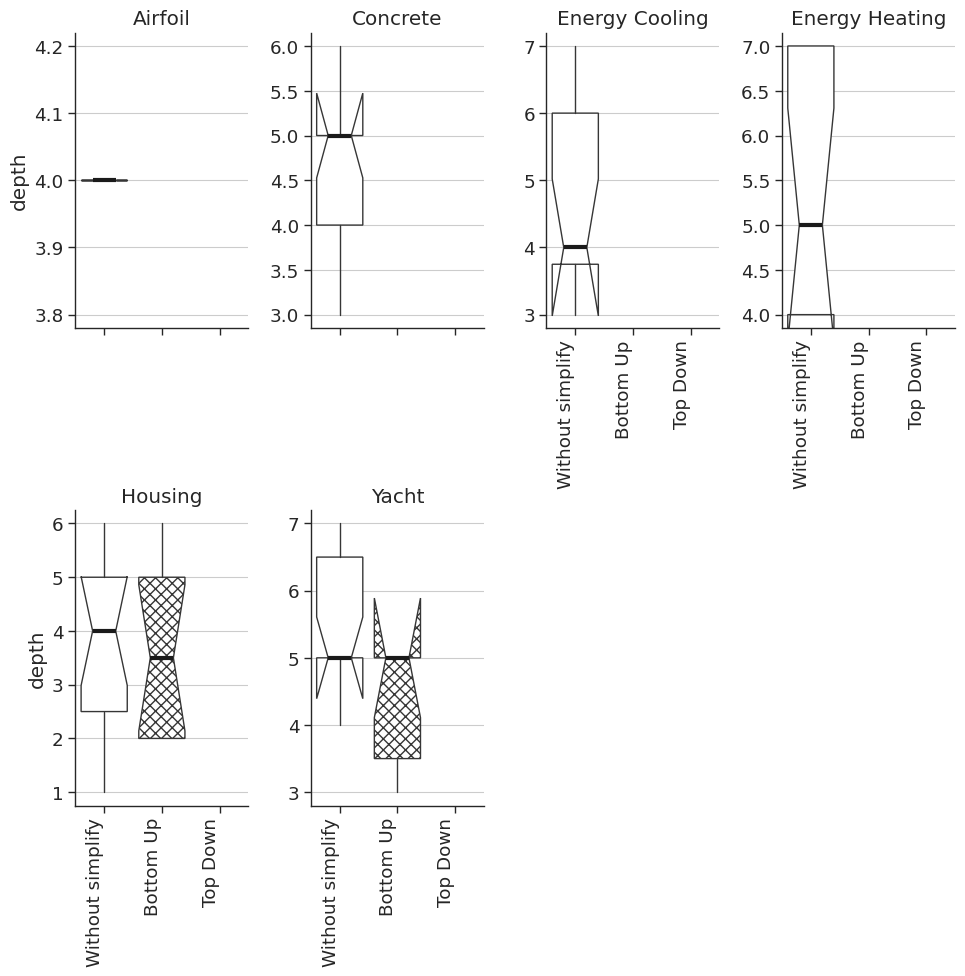

failed to add statsannotation with dataset Airfoil
failed to add statsannotation with dataset Concrete
failed to add statsannotation with dataset Energy Cooling
failed to add statsannotation with dataset Energy Heating
failed to add statsannotation with dataset Housing
failed to add statsannotation with dataset Yacht


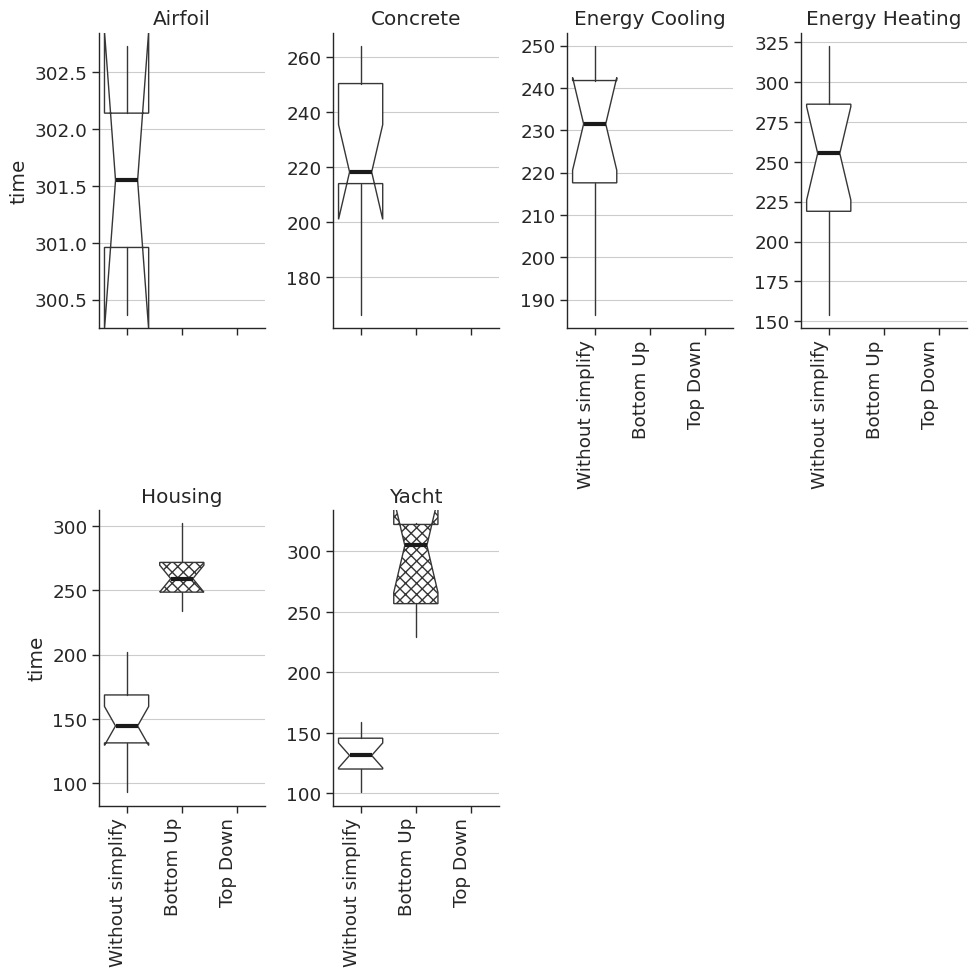

In [2]:
results_df['(only last)'] = results_df['model'].apply(lambda model: model.endswith("(only last)"))
  
for yaxis in ['size', 'test_mse', 'test_r2', 'train_mse', 'complexity', 'depth', 'time']:
    
    # Exploring boxplot results first
    g = sns.catplot(data=results_df, x='model', y=yaxis, hue='(only last)',
        col='dataset', col_wrap=col_wrap, order=order, 
        **boxplot_kwargs, sharey=False, legend_out=False, aspect=0.5)

    # g.map_dataframe(sns.swarmplot, x="model", y=yaxis, 
    #                 palette=["#000000"], size=3,
    #                 alpha=0.5, dodge=True)

    g.set_titles("{col_name}").set_axis_labels("", yaxis.replace("_", " "))

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='y', linewidth=.8)
        
        for tick in plot_ax.get_xticklabels():
            tick.set(rotation=90, ha="right")

        # All vs baseline
        pairs = [('Without simplify', l)
                    for l in results_df[results_df['dataset']==ds]['model'].unique()
                    if l != 'Without simplify']

        # Contextual vs non-NSGA2
        # pairs = [
        #     ('Baseline', 'C-D-TS')
        # ]

        if True:
            try:
                annotator = Annotator(
                    plot_ax, pairs, data=results_df[(results_df['dataset']==ds)],
                    x='model', y=yaxis,
                    order=order)
                annotator.reset_configuration()
                annotator.configure(test="Mann-Whitney", hide_non_significant=True, #text_format='full',
                                    comparisons_correction="holm", verbose=0, text_offset=-3)
                
                # Calculate and annotate
                annotator.apply_and_annotate()
            except:
                print(f"failed to add statsannotation with dataset {ds}")

    # Adding hatches -------------------------------------------------------------------
    # comment/uncomment block to add hatches. Make sure to uncomment hue when generating the plot
        hatches = ['///', 'xxx']
        # select the correct patches
        patches = [patch for patch in plot_ax.patches if type(patch) == mpl.patches.PathPatch]
        # the number of patches should be evenly divisible by the number of hatches
        h = hatches * (len(patches) // len(hatches))

        # iterate through the patches for each subplot
        for patch, model in zip(patches, order):
            if model != 'Without simplify':
                patch.set_hatch(hatches[0 if model.endswith("(only last)") else 1])
            
    # Fixing the legend to add the hatches
    for lp, hatch in zip(g.legend.get_patches(), hatches):
        lp.set_hatch(hatch)
        lp.set_facecolor('none')
    # ----------------------------------------------------------------------------------
    #g.set(yscale="log")

    g._legend.remove()
    plt.tight_layout()
    plt.savefig(f"../paper/figs/{yaxis}_boxplot.pdf")
    plt.savefig(f"../paper/figs/{yaxis}_boxplot.png")
    plt.show()  
    
    if False:
        cd_df = results_df.copy()#.dropna() # (Just Island model sometimes gives an NAN)
        
        # Line below controls if we take the median or use each random seed as a different problem in CD
        # cd_df = cd_df.groupby(['model', 'dataset']).median().reset_index()
        
        cd_df = cd_df[cd_df.model.isin(model_nice)]
        cd_df['dataset_random_state'] = cd_df['dataset'] + '_' + cd_df['random_state'].astype(str)

        cd_df = cd_df[['model', 'dataset_random_state', yaxis]]
        display(cd_df.pivot('dataset_random_state', 'model').sample(3).style.background_gradient(cmap='viridis_r', axis=1))
        
        cd_df.columns = ['classifier_name', 'dataset_name', 'accuracy']
        # display(cd_df.sample())

        if yaxis != 'test_r2': # if smaller is better
            cd_df.accuracy = cd_df.accuracy*-1 

        # for ds in results_df['dataset'].unique():
        #     print(ds)
        #     draw_cd_diagram(cd_df[cd_df['dataset_name'].str.startswith(ds)],
        #                    alpha=0.05, path=f"../paper/figs/{yaxis}_criticaldifferences_{ds}.pdf")

        print("final critical differences diagram")
        draw_cd_diagram(cd_df, alpha=0.05, path=f"../paper/figs/{yaxis}_criticaldifferences.pdf")